"flowchart" per l'applicazione.

1. lettura e preprocessing dei dati
2. lavorazione sul modello
3. generazione output 
4. valutazione output

In [8]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from aeon.visualisation import plot_series_with_change_points
from claspy.segmentation import BinaryClaSPSegmentation

In [20]:
# Questi sono tutte le features estratte
# kineticglobal,kineticchest,directnesshead,density,leftwristke,,rightwristke,leftankleke,rightankleke,headke,posturaltension

# Queste sono le feature che utilizzeremo
# kineticglobal, density, leftwirstke, rightwristke, leftankleke, rightankleke, headke, posturaltension
# che corrispondono
# Questa funzione legge il file di input e restituisce un dataframe con i dati preprocessati
def ReadAndPreProcess(inputDataRaw):
    # lettura
    df=pd.read_csv(inputDataRaw,sep=' ', header=None)

    ## preprocessing

    # dealing NaN values
    #-serafino ha usato forward fill, backward fill, linear interpolation
    #-ricordo che serafino aveva gia utilizzato sta cosa sui dati grezzi non sulle feature ma sui dati prefeature percio dovrebbe essere gia apposto

    # downsampling
    #-sono a 100ms, non sò se devo scendere a 50ms. da decidere

    # low pass filter
    #-Skogstad and colleagues (2013) e https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units
    #-implementare dopo

    # remove outliers
    #-utilizzare hampel filter

    # stretch
    #-forse devo stretcharlo come ho fatto precedentemente
    #-anche se nel codice precedente ho stretchato solo il groundtruth

    # ritorno un oggetto dataframe dopo che è stato lavorato, ottenendo un prodotto lavorato
    return df



In [49]:
# questa funzione ritorna un dataframe del groundtruth che viene usato specificatamente per visualizzare il gt
# è soggetto a un preprocessing dei dati siccome l'ultimo groundtruth è dove termina il ts del gt
# di conseguenza per farlo corrispondere, bisogna stretcharlo
# ma ricordo di aver rifatti i dati nuovi per generare un groundtruth a fine ts, da controllare cosi che non serve stretcharlo?
def LoadingGroundTruth(df,gtraw):
    gt=pd.read_csv(gtraw,sep=' ', header=None)
    gt=gt.iloc[:,0].values
    #stretching dei dati se necessario per farlo corrispondere alla ts dei dati
    stretch_gt = np.array([])
    for idx,i in enumerate(gt):
        relpos = len(df)*i/gt[-1]
        stretch_gt = np.append(stretch_gt,relpos)
        
    return stretch_gt

In [19]:
# utilizzo CLASP per trovare i CP
# prende come parametro un dataframe e restituisce il clasp score
def GetClasp(df):
    #result=np.array([])
    result=[]
    for idx,i in enumerate([2,4,5,6,7,8,9,10]):
        ts=df.iloc[:,i]

        clasp = BinaryClaSPSegmentation()
        found_cps = clasp.fit_predict(ts.values)     
        result.append(found_cps)  
        #result = np.sort(np.append(result,current_result).flatten())

        
    return result
        
    


In [86]:
def PlotResult(df,gt,cp):
    print(gt.astype(int))
    for idx,i in enumerate([2,4,5,6,7,8,9,10]):
        
        

        plt.figure(figsize=(16,5))
        plt.plot(np.arange(len(df.iloc[:,i].values)),df.iloc[:,i].values,'blue',linewidth=0.5)
        for idx2,j in enumerate(gt.astype(int)):

            plt.axvline(x = j, color = 'green',linewidth=1) 

        _ = plot_series_with_change_points(df.iloc[:,i], cp[idx], title="prediction number: "+str(idx))
        plt.show()
    


[  296   468   990  1483  1989  2441  2564  3967  5063  5608  5789  6458
  7015  7716  8409  8607 10134 10315]


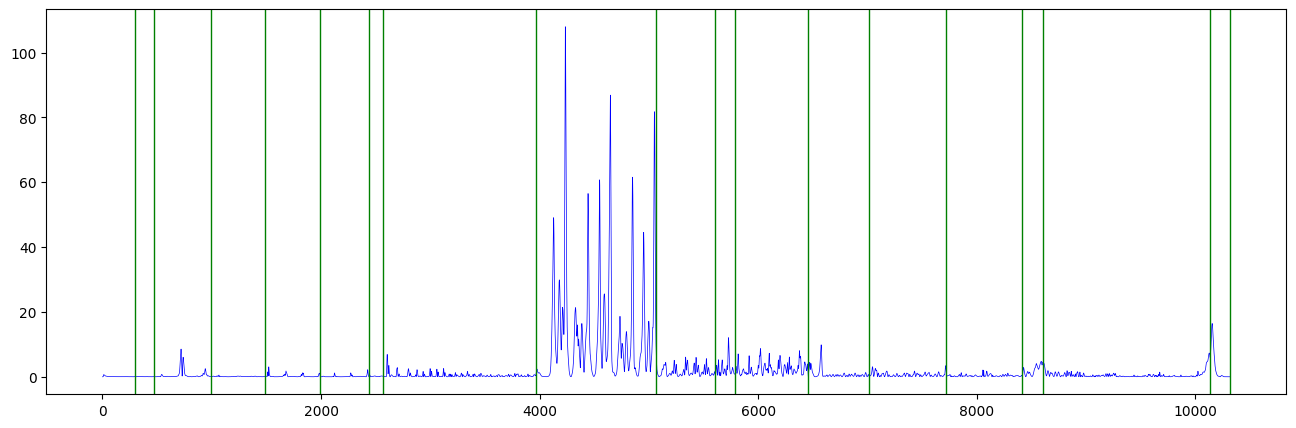

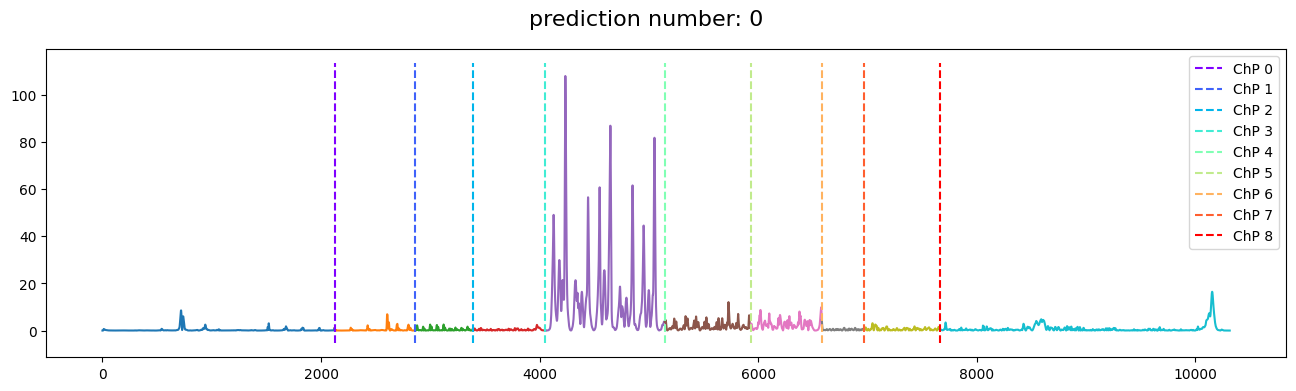

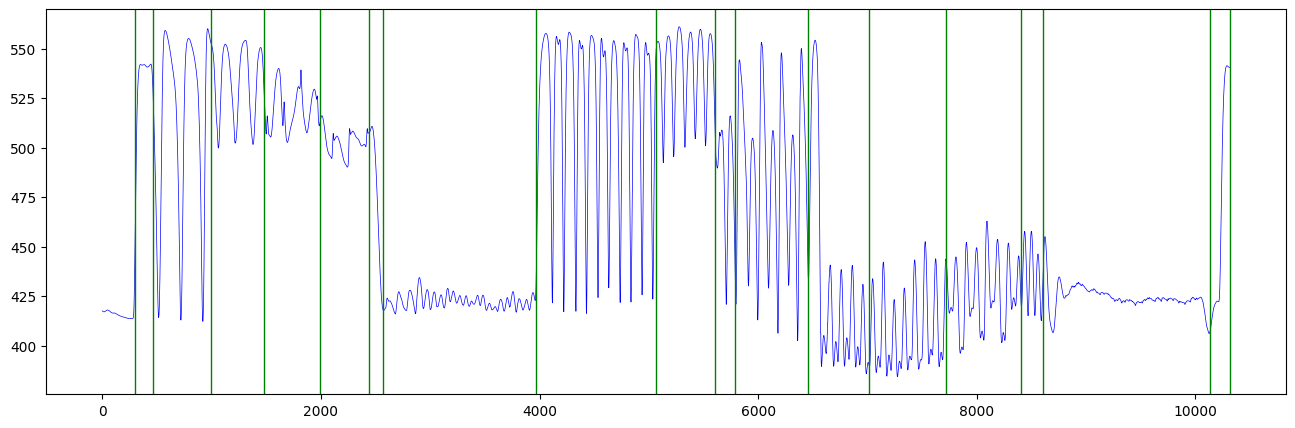

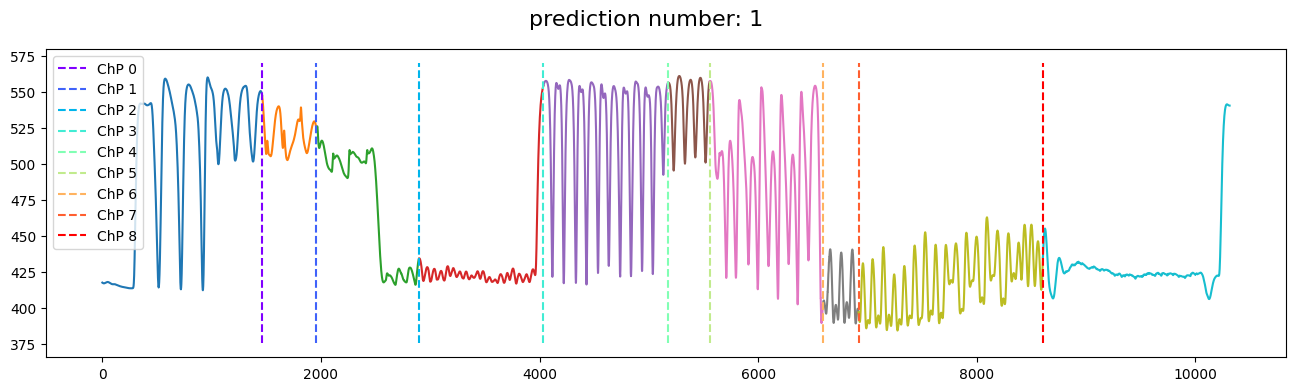

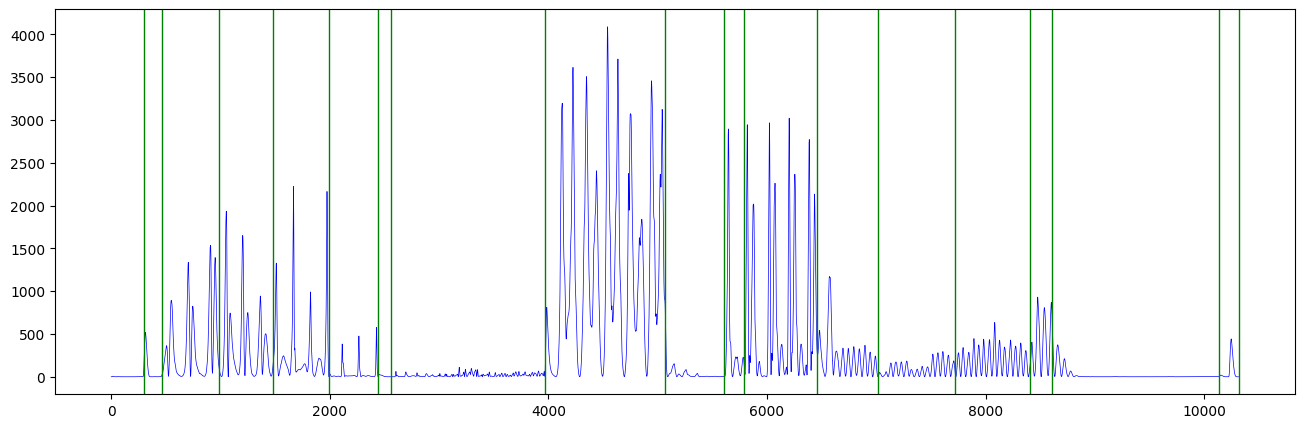

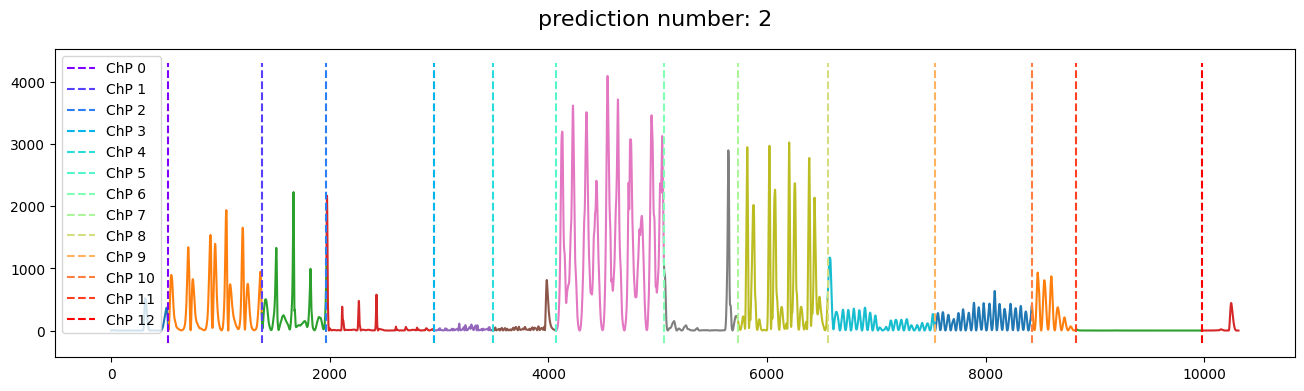

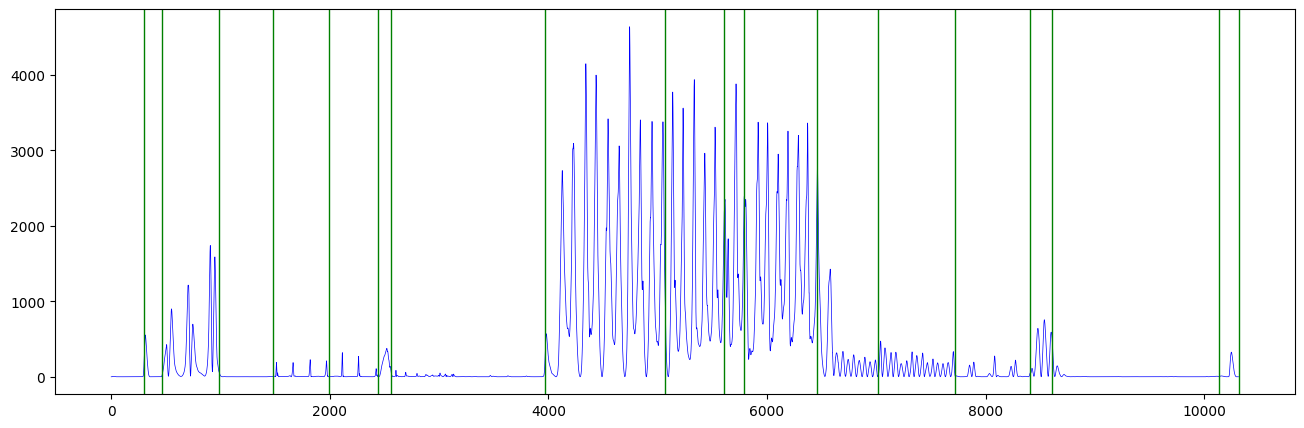

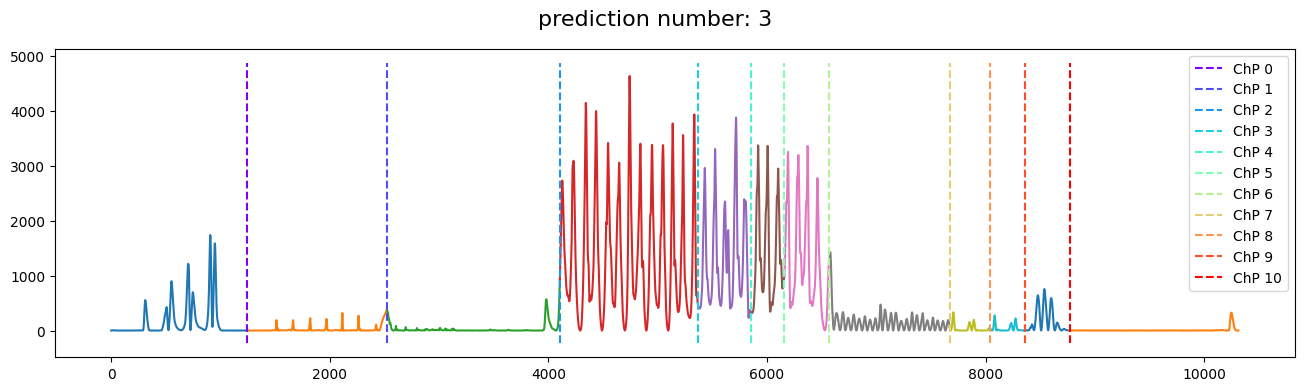

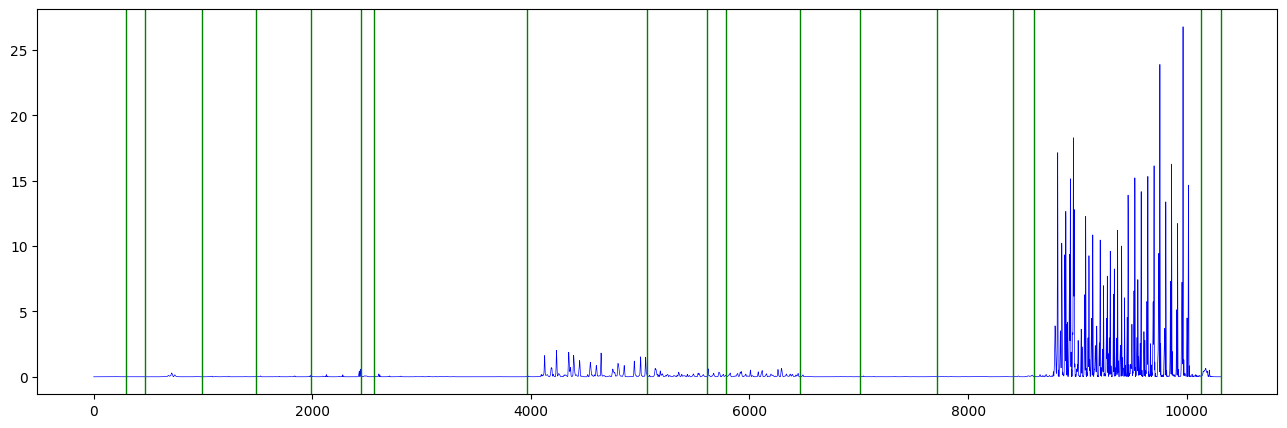

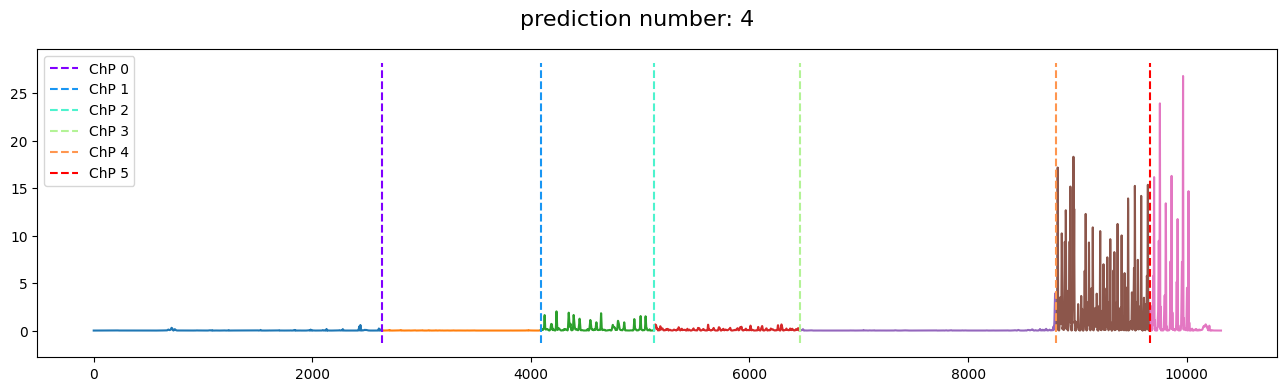

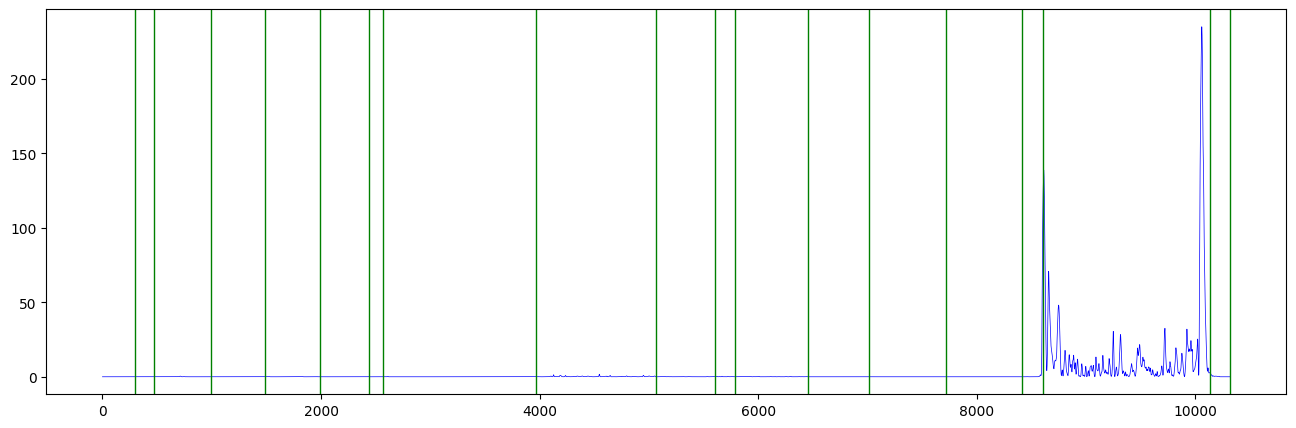

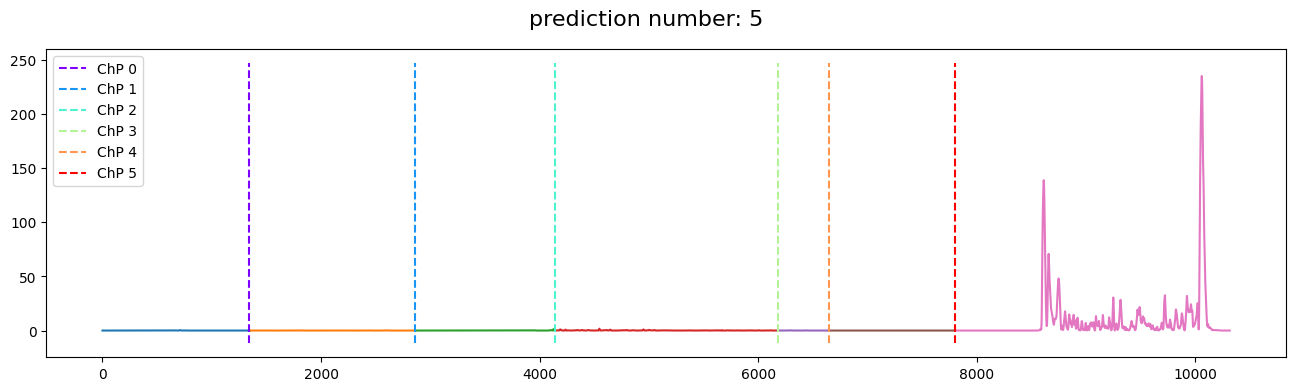

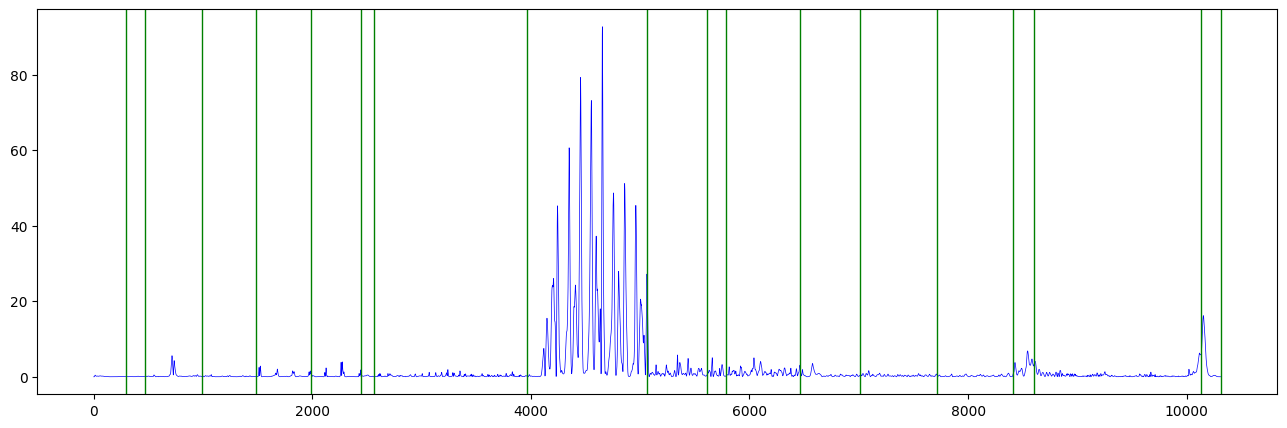

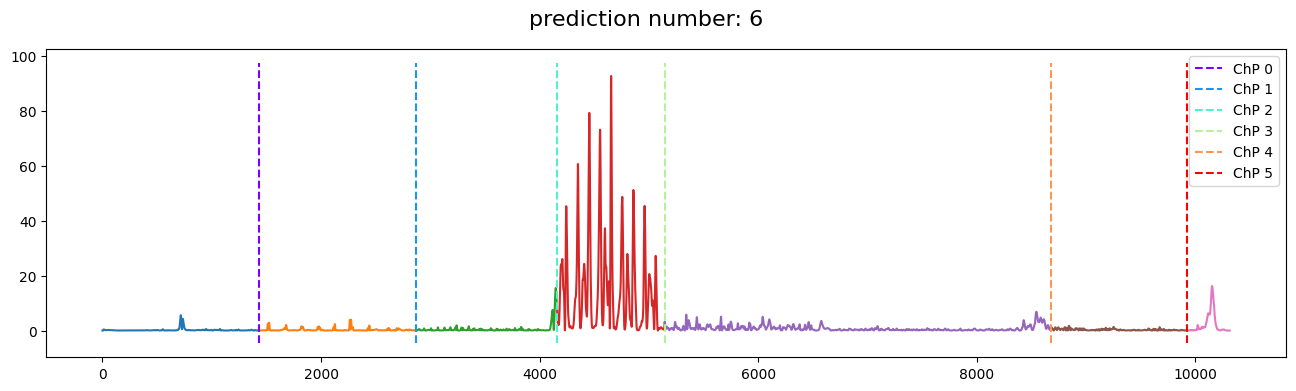

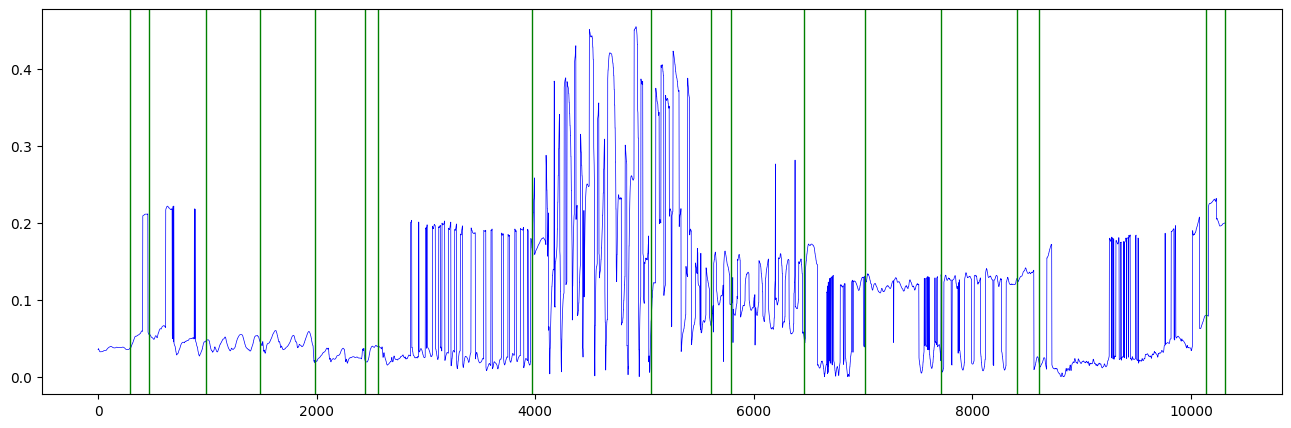

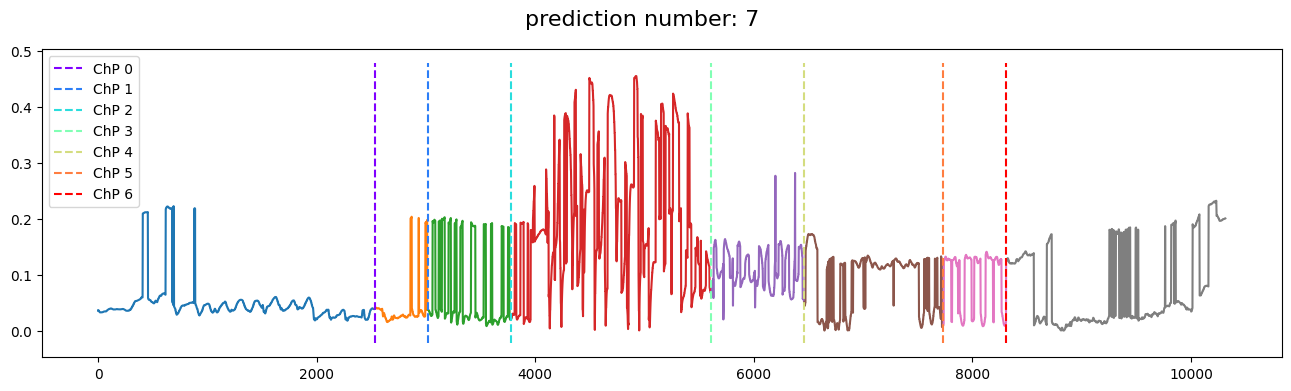

In [87]:
#ComputeScore(["in\cora5_input.txt"], ["in\cora5_input.txt"], ["gt\cora5_gt.txt"], ["gt\cora5_gt.txt"])
df=ReadAndPreProcess("in\cora5_input.txt")
cp=GetClasp(df)
gt=LoadingGroundTruth(df,"gt\cora5_gt.txt")
PlotResult(df,gt,cp)
#gt.values.flatten()